In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving shape_predictor_68_face_landmarks.dat to shape_predictor_68_face_landmarks.dat


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fahad___final_with_main_features.csv to Fahad___final_with_main_features (1).csv


In [ ]:
df = pd.read_csv('Fahad___final_with_main_features.csv',sep=',')
df = df.drop(df.columns[0],axis=1)

In [ ]:
train_percentage = 17/22
train_index = int(len(df)*train_percentage)
test_index = len(df)-train_index

In [ ]:
df_train = df[:train_index]
df_test = df[-test_index:]

In [ ]:
X_test = df_test.drop(["Y"],axis=1)
y_test = df_test["Y"]

In [ ]:
X_train = df_train.drop('Y',axis=1)
y_train = df_train['Y']

In [ ]:
def average(y_pred):
  for i in range(len(y_pred)):
    if i % 240 == 0 or (i+1) % 240 == 0:
      pass
    else: 
      average = float(y_pred[i-1] +  y_pred[i] + y_pred[i+1])/3
      if average >= 0.5:
        y_pred[i] = 1
      else:
        y_pred[i] = 0
  return y_pred

In [ ]:
X_train_shaped = np.expand_dims(X_train, axis=2)

In [ ]:
X_train_shaped.shape

(8160, 8, 1)

In [ ]:
X_test_shaped = np.expand_dims(X_test, axis=2)

In [ ]:
X_test_shaped.shape

(2400, 8, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv1D
from keras.optimizers import Adam, RMSprop
from keras.layers import Dropout
## Create Model ##

model = Sequential()

model.add(Conv1D(64, kernel_size = 3, activation = 'relu', input_shape = (8,1)))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation = 'sigmoid'))


## Compile Model ##
optimizer = Adam(lr=0.00001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

## Train Model and Check Validation Accuracy ##
model.fit(X_train_shaped, y_train, validation_data = (X_test_shaped,y_test), epochs = 100)

Epoch 1/100
255/255 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5267 - val_loss: 0.8235 - val_accuracy: 0.5567
Epoch 2/100
255/255 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.5806 - val_loss: 0.7750 - val_accuracy: 0.5717
Epoch 3/100
255/255 [==============================] - 0s 1ms/step - loss: 0.6660 - accuracy: 0.6088 - val_loss: 0.7385 - val_accuracy: 0.5867
Epoch 4/100
255/255 [==============================] - 0s 1ms/step - loss: 0.6595 - accuracy: 0.6261 - val_loss: 0.7195 - val_accuracy: 0.5958
Epoch 5/100
255/255 [==============================] - 0s 2ms/step - loss: 0.6523 - accuracy: 0.6362 - val_loss: 0.7127 - val_accuracy: 0.6050
Epoch 6/100
255/255 [==============================] - 0s 2ms/step - loss: 0.6449 - accuracy: 0.6403 - val_loss: 0.7022 - val_accuracy: 0.6100
Epoch 7/100
255/255 [==============================] - 0s 2ms/step - loss: 0.6374 - accuracy: 0.6570 - val_loss: 0.6956 - val_accuracy: 0.6125

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 6, 64)             256       
_________________________________________________________________
flatten_7 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                12320     
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 17        
Total params: 13,121
Trainable params: 13,121
Non-trainable params: 0
__________________________________________________

[0.7191666666666666, 0.7421576128538638, 0.7770565972222222]
[[756 444]
 [230 970]]


Text(0.5, 1.0, 'CNN')

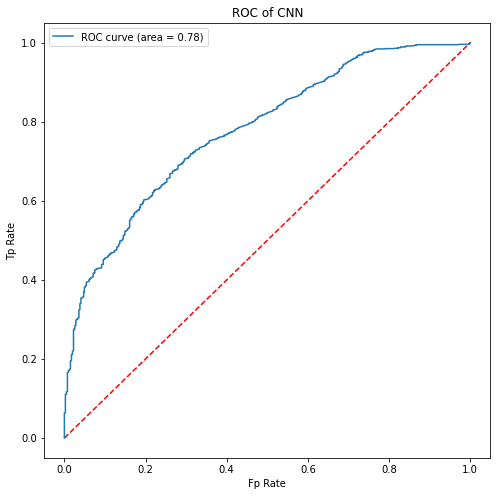

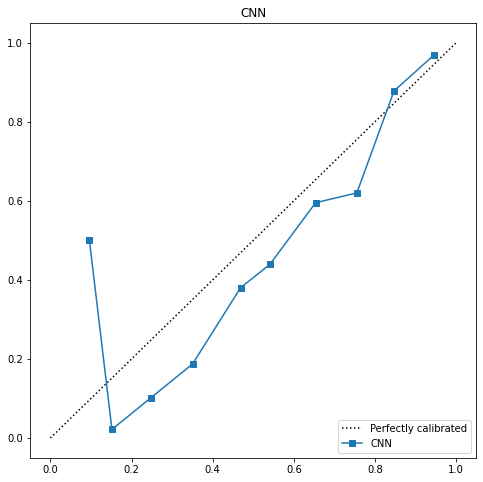

In [ ]:
pred_cnn = model.predict_classes(X_test_shaped)
pred_cnn = average(pred_cnn)
y_score_7 = model.predict_proba(X_test_shaped)
acc7 = accuracy_score(y_test, np.array(pred_cnn))
f1_score_7 = metrics.f1_score(y_test, pred_cnn)
roc_7 = metrics.roc_auc_score(y_test, y_score_7)
print([acc7,f1_score_7,roc_7])
print(confusion_matrix(y_test, pred_cnn))



import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1],'r--')
fpr, tpr, thresholds = roc_curve(y_test, y_score_7)
plt.plot(fpr, tpr, label= 'ROC curve (area = %0.2f)' % roc_7)
plt.title('ROC of CNN')
plt.xlabel('Fp Rate')
plt.ylabel('Tp Rate')
plt.legend()


from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_test,y_score_7,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'CNN')
plt.legend(loc="lower right")
plt.title('CNN')

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Fahad___final_with_main_features.csv',sep=',')

In [ ]:
df=df.drop(df.columns[0], axis=1)

In [ ]:
train_percentage = 17/22
train_index = int(len(df)*train_percentage)
test_index = len(df)-train_index

In [ ]:
df_train = df[:train_index]
df_test = df[-test_index:]

In [ ]:
x_test = df_test.drop(["Y"],axis=1)
y_test = df_test["Y"]

In [ ]:
x_train = df_train.drop('Y',axis=1)
y_train = df_train['Y']

In [ ]:
x_test.shape

(2400, 8)

In [ ]:
x_train.shape


(8160, 8)

In [ ]:
import numpy as np
x_shaped_train  = np.array(x_train).reshape(1632,5,8)
x_shaped_test  = np.array(x_test).reshape(480,5,8)

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

y_shaped_train  = []
for i in range(0, len(y_train), 5):
  y_shaped_train.append([y_train[i]])
print(len(y_shaped_train))

y_shaped_test  = []
for i in range(0, len(y_test), 5):
  y_shaped_test.append([y_test[i]])
print(len(y_shaped_test))

1632
480


In [ ]:
x_shaped_train.shape

(1632, 5, 8)

In [ ]:
x_shaped_test.shape

(480, 5, 8)

In [ ]:
y_shaped_train = np.array(y_shaped_train)
y_shaped_train.shape

(1632, 1)

In [ ]:
y_shaped_test = np.array(y_shaped_test)
y_shaped_test.shape

(480, 1)

In [ ]:
import numpy as np
from keras.utils import to_categorical
from keras.layers import Dense, Flatten, Dropout, ZeroPadding3D
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
from keras.optimizers import Adam, RMSprop
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import (Conv2D, MaxPooling3D, Conv3D,
    MaxPooling2D)
from collections import deque
import sys

metrics = ['accuracy']
model = Sequential()
model.add(Dense(1024, activation='sigmoid'))
model.add(LSTM(512, return_sequences=True,
                       input_shape=(5, 4,),
                       dropout=0.5))

model.add(Flatten())
# Dense is fully connected layer. 16 hidden units
# activation for lstm is basically sigmoid or tanh
model.add(Dense(216, activation='sigmoid')) #FC1
model.add(Dense(32, activation='tanh')) #FC2
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))#FC3
model.add(Dropout(0.5))
model.add(Dense(1, activation='tanh'))#Output Layer
optimizer = Adam(lr=0.00005)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=metrics)
model.fit(x_shaped_train, y_shaped_train, validation_data = (x_shaped_test,y_shaped_test), epochs=50, batch_size=  10)
model.predict_classes(x_shaped_test)

Epoch 1/50
164/164 [==============================] - 21s 131ms/step - loss: 1.8104 - accuracy: 0.4908 - val_loss: 0.7070 - val_accuracy: 0.5000
Epoch 2/50
164/164 [==============================] - 21s 128ms/step - loss: 1.1918 - accuracy: 0.5190 - val_loss: 0.7248 - val_accuracy: 0.5000
Epoch 3/50
164/164 [==============================] - 21s 128ms/step - loss: 1.1946 - accuracy: 0.5214 - val_loss: 0.7111 - val_accuracy: 0.4833
Epoch 4/50
164/164 [==============================] - 21s 128ms/step - loss: 1.1988 - accuracy: 0.5067 - val_loss: 0.6855 - val_accuracy: 0.6375
Epoch 5/50
164/164 [==============================] - 21s 127ms/step - loss: 1.0533 - accuracy: 0.5276 - val_loss: 0.6862 - val_accuracy: 0.6500
Epoch 6/50
164/164 [==============================] - 21s 128ms/step - loss: 0.9829 - accuracy: 0.5129 - val_loss: 0.6905 - val_accuracy: 0.6167
Epoch 7/50
164/164 [==============================] - 21s 127ms/step - loss: 1.0082 - accuracy: 0.5214 - val_loss: 0.7058 - val_ac

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

pred_rnn = model.predict_classes(x_shaped_test)
y_score_10 = model.predict_proba(x_shaped_test)
acc10 = accuracy_score(y_shaped_test, pred_rnn)
f1_score_10 = metrics.f1_score(y_shaped_test, np.array(pred_rnn))
roc_10 = metrics.roc_auc_score(y_shaped_test, y_score_10)
print([acc10, f1_score_10, roc_10])
print(confusion_matrix(y_shaped_test, pred_rnn))

[0.6416666666666667, 0.7123745819397993, 0.6418402777777777]
[[ 95 145]
 [ 27 213]]


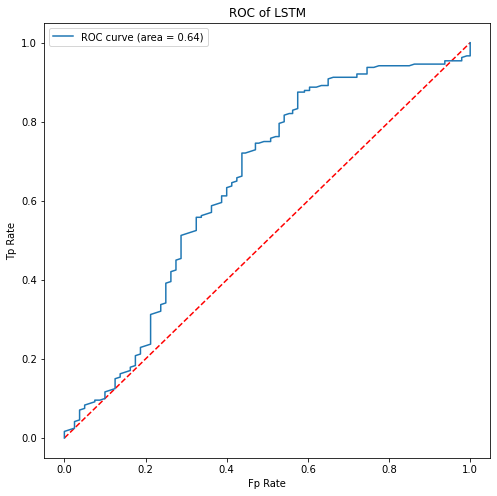

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1],'r--')
fpr, tpr, thresholds = roc_curve(y_shaped_test, y_score_10)
plt.plot(fpr, tpr, label= 'ROC curve (area = %0.2f)' % roc_10)
plt.title('ROC of LSTM')
plt.xlabel('Fp Rate')
plt.ylabel('Tp Rate')
plt.legend()

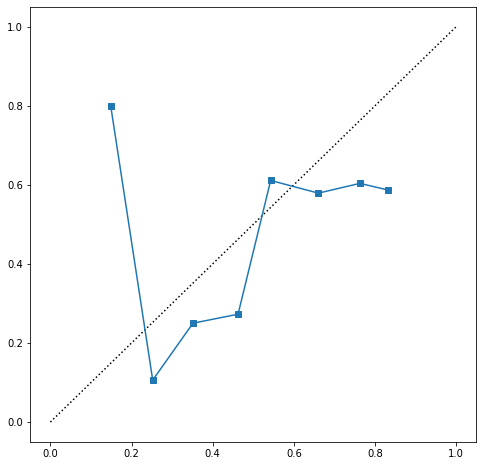

In [ ]:
from sklearn.calibration import calibration_curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value=calibration_curve(y_shaped_test,y_score_10,n_bins=10)
plt.plot(mean_predicted_value, fraction_of_positives,"s-",
                 label="%s" % 'LSTM')